# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
response

<Response [200]>

In [5]:
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
df_image.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

### Not able to get the Twitter API working correctly, so I downloaded the JSON file and will use that instead

In [7]:
# File has already been downloaded into the correct folder,
# just need to read the file line by line into dataframe
df_list = []
with open ('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        json_list = json.loads(line)
        df_list.append({'tweet_id': json_list['id'],
                       'retweet_count': json_list['retweet_count'],
                       'favorite_count': json_list['favorite_count']})
df_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [8]:
df_json.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
df_arch.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,None,None,None,None,None
802,772193107915964416,NaN,NaN,2016-09-03 22:02:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Willem. He's a Penn State pupper. Thin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772193107...,12,10,Willem,None,None,pupper,None
860,763167063695355904,NaN,NaN,2016-08-10 00:16:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Eve. She's a raging alcoho...,6.732953e+17,4.196984e+09,2015-12-06 00:17:55 +0000,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None
1618,684969860808454144,6.849598e+17,4.196984e+09,2016-01-07 05:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For those who claim this is a goat, u are wron...",NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
445,819227688460238848,NaN,NaN,2017-01-11 17:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's wondering if you come here ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819227688...,12,10,Finn,None,None,None,None
930,754449512966619136,NaN,NaN,2016-07-16 22:55:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dex. He can see into your past and fut...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754449512...,11,10,Dex,None,None,None,None
530,808134635716833280,NaN,NaN,2016-12-12 02:21:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Milo. I would do terrib...,8.011679e+17,4.196984e+09,2016-11-22 20:58:07 +0000,https://twitter.com/dog_rates/status/801167903...,13,10,Milo,None,None,None,None
596,798697898615730177,NaN,NaN,2016-11-16 01:23:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stubert. He just arrive...,7.128090e+17,4.196984e+09,2016-03-24 01:11:29 +0000,https://twitter.com/dog_rates/status/712809025...,10,10,Stubert,None,None,None,None
1787,677565715327688705,NaN,NaN,2015-12-17 19:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Contortionist pup here. Inside pentagram. Clea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677565715...,6,10,None,None,None,None,None
2312,666776908487630848,NaN,NaN,2015-11-18 00:36:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Josep. He is a Rye Manganese mix. Can ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666776908...,5,10,Josep,None,None,None,None


In [10]:
df_image.head(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### 1. Colums above contain `False` in columns `p1_dog`, `p2_dog`, and `p3_dog`. These are not dogs, so rows with `False` in all 3 columns should be removed
#### 2. Some dogs have no name. These rows should be removed

In [11]:
df_json.head(50)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [12]:
len(df_json.loc[df_json['favorite_count']==0])

179

#### There are 179 rows in the `favorite_count` column that have no favorites

In [13]:
len(df_json.loc[df_json['retweet_count']==0])

1

#### And there is 1 row with no retweets in the `retweet_count` column

In [14]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### The `timestamp` column should be in a `datetime` format

In [15]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [16]:
df_image.value_counts('p1')

p1
golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
hay                     1
hotdog                  1
hummingbird             1
ibex                    1
zebra                   1
Length: 378, dtype: int64

In [17]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_arch[df_arch.duplicated(['tweet_id'], keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [19]:
df_image[df_image.duplicated(['tweet_id'], keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [20]:
df_json[df_json.duplicated(['tweet_id'], keep=False)]

,tweet_id,retweet_count,favorite_count


#### With the 3 checks above, there are no duplicate `tweet_id` rows in any table

In [21]:
df_image[df_image.duplicated(['jpg_url'], keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True


#### 132 rows in the `df_image` table use a duplicate picture. These should be removed

### Quality issues
`df_arch` table:

1. `timestamp` column is a `datetime` datatype, not an `object`.
2. `rating_numerator` and `rating_denominator` have a minimum value of 0 for some rows
3. Remove rows that have data in the `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns since we only want original tweets per the instructions
4. Remove rows with "none" in the `name` column

`df_image` table:

5. Delete entries where `p1_dog`, `p2_dog`, and `p3_dog` columns are `False`, these are identified as ther animals or other objects
6. Delete duplicate `jpg_url` entries

`df_json` table:

7. `favorite_count` column is empty for 179 rows, `retweet_count` column is empty for 1 row

All tables:

8. Convert `tweet_id` to a string

### Tidiness issues
1. `doggo`, `floofer`, `pupper` and `puppo` columns in the `df_arch` dataset can be combined into one column
2. Combine all tables into one dataset

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
arch_clean = df_arch.copy()
image_clean = df_image.copy()
json_clean = df_json.copy()

In [23]:
# Verify copies have been made
arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [24]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
json_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Issue #1:

#### Define: In the `arch_clean` dataframe, the `timestamp` column should be a `datetime` datatype, not an `object`.

#### Code

In [26]:
# Convert timestamp to a datetime datatype
arch_clean.timestamp = pd.to_datetime(arch_clean.timestamp)

#### Test

In [27]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [28]:
arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #2:

#### Define: The `arch_clean` table has rows where`rating_numerator` and `rating_denominator` have a minimum value of 0. These should be removed

#### Code

In [29]:
# remove rows with 0 in the rating_denominator column
arch_clean = arch_clean[(arch_clean.rating_denominator !=0)]

In [30]:
# remove rows with 0 in the rating_numerator column
arch_clean = arch_clean[(arch_clean.rating_numerator !=0)]

#### Test

In [31]:
# view value counts to ensure no rating_denominator rows include 0
arch_clean.value_counts('rating_denominator')

rating_denominator
10     2331
50        3
11        3
80        2
20        2
150       1
130       1
120       1
110       1
90        1
2         1
70        1
7         1
40        1
16        1
15        1
170       1
dtype: int64

In [32]:
# view value counts to ensure no rating_numerator rows include 0
arch_clean.value_counts('rating_numerator')

rating_numerator
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
15        2
420       2
75        2
666       1
204       1
182       1
88        1
165       1
144       1
143       1
121       1
99        1
27        1
84        1
80        1
60        1
50        1
45        1
44        1
26        1
24        1
20        1
17        1
1776      1
dtype: int64

### Issue #3:

#### Define: The `arch_clean` table has rows that have data in the `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns since we only want original tweets per the instructions. These rows should be removed, and the columns removed since they won't have any data in them. Columns for `in_reply_to_status_id` and `in_reply_to_user_id` should be deleted as well

#### Code

In [33]:
# remove rows where retweeted_status_id is null
arch_clean = arch_clean[arch_clean['retweeted_status_id'].isnull()]

In [34]:
# remove columns listed above and in following list
arch_clean = arch_clean.drop(['retweeted_status_id',
                              'retweeted_status_user_id',
                              'retweeted_status_timestamp',
                              'in_reply_to_status_id',
                              'in_reply_to_user_id'], axis=1)

#### Test

In [35]:
# view arch_clean info to ensure columns are deleted
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2172 non-null   int64              
 1   timestamp           2172 non-null   datetime64[ns, UTC]
 2   source              2172 non-null   object             
 3   text                2172 non-null   object             
 4   expanded_urls       2115 non-null   object             
 5   rating_numerator    2172 non-null   int64              
 6   rating_denominator  2172 non-null   int64              
 7   name                2172 non-null   object             
 8   doggo               2172 non-null   object             
 9   floofer             2172 non-null   object             
 10  pupper              2172 non-null   object             
 11  puppo               2172 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #4:

#### Define: In the `df_arch` table, remove rows with "none" in the `name` column

#### Code

In [36]:
# remove rows with none in the name column
arch_clean = arch_clean[(arch_clean.name !='none')]

#### Test

In [37]:
arch_clean[(arch_clean['name'] == 'none')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5:

#### Define: In the `image_clean` table, delete entries where `p1_dog`, `p2_dog`, and `p3_dog` columns are `False`, these are identified as ther animals or other objects

#### Code

In [38]:
# remove rows where p1_dog, p2_dog, and p3_dog are all False
image_clean = image_clean[((image_clean['p1_dog'] == True) &
                          (image_clean['p2_dog'] == True) &
                          (image_clean['p3_dog'] == True))]

#### Test

In [39]:
# verify no row contains False in all 3 columns
image_clean[((image_clean['p1_dog'] == False) &
             (image_clean['p2_dog'] == False) &
             (image_clean['p3_dog'] == False))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #6:

#### Define: Delete duplicate `jpg_url` entries from the `image_clean` table. People may have resubmitted the same image to get these duplicate entries. We will keep the original url and drop any duplicates

#### Code

In [40]:
# remove duplicates for jpg_url
image_clean = image_clean.drop_duplicates(subset='jpg_url', keep='first')

#### Test

In [41]:
# run the same command from the assess portion above to see how many duplicates remain,
# updating the command with the name of the copied dataframe
image_clean[image_clean.duplicated(['jpg_url'], keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #7:

#### Define: In the `df_json` table, the `favorite_count` column is empty for 179 rows and the `retweet_count` column is empty for 1 row

#### Code

In [42]:
# remove rows with 0 in the favorite_count column
json_clean = json_clean[(json_clean.favorite_count !=0)]

In [43]:
# remove rows with 0 in the retweet_count column
json_clean = json_clean[(json_clean.retweet_count !=0)]

#### Test

In [44]:
# run the same commands from the assess portion above,
# updating the dataframe name to the copied version
len(json_clean.loc[json_clean['favorite_count']==0])

0

In [45]:
len(json_clean.loc[json_clean['retweet_count']==0])

0

### Issue #8:

#### Define: for all 3 tables, change the `tweet_id` datatype to `object`

#### Code

In [46]:
arch_clean.tweet_id = arch_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
json_clean.tweet_id = json_clean.tweet_id.astype(str)

#### Test

In [47]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2172 non-null   object             
 1   timestamp           2172 non-null   datetime64[ns, UTC]
 2   source              2172 non-null   object             
 3   text                2172 non-null   object             
 4   expanded_urls       2115 non-null   object             
 5   rating_numerator    2172 non-null   int64              
 6   rating_denominator  2172 non-null   int64              
 7   name                2172 non-null   object             
 8   doggo               2172 non-null   object             
 9   floofer             2172 non-null   object             
 10  pupper              2172 non-null   object             
 11  puppo               2172 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

In [48]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1206 non-null   object 
 1   jpg_url   1206 non-null   object 
 2   img_num   1206 non-null   int64  
 3   p1        1206 non-null   object 
 4   p1_conf   1206 non-null   float64
 5   p1_dog    1206 non-null   bool   
 6   p2        1206 non-null   object 
 7   p2_conf   1206 non-null   float64
 8   p2_dog    1206 non-null   bool   
 9   p3        1206 non-null   object 
 10  p3_conf   1206 non-null   float64
 11  p3_dog    1206 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 97.8+ KB


In [49]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2174 non-null   object
 1   retweet_count   2174 non-null   int64 
 2   favorite_count  2174 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 67.9+ KB


### Tidiness #1:

#### Define: `doggo`, `floofer`, `pupper` and `puppo` columns in the `df_arch` dataset can be combined into one column

#### Code

In [50]:
arch_clean = pd.melt(arch_clean, id_vars = ['tweet_id',
                                            'timestamp',
                                            'source', 'text',
                                            'expanded_urls',
                                            'rating_numerator',
                                            'rating_denominator',
                                            'name'],
                    value_vars = ['doggo', 'floofer', 'pupper', 'puppo'],
                    var_name = 'dog_type')

#### Test

In [51]:
arch_clean.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,value
518,793165685325201412,2016-10-31 19:00:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Benji. He's Air Bud. It's a low effort...,https://twitter.com/dog_rates/status/793165685...,12,10,Benji,doggo,None
6401,667937095915278337,2015-11-21 05:26:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This dog resembles a baked potato. Bed looks u...,https://twitter.com/dog_rates/status/667937095...,3,10,None,pupper,None
5945,677673981332312066,2015-12-18 02:17:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Endangered triangular pup here. Could be a wiz...,https://twitter.com/dog_rates/status/677673981...,9,10,None,pupper,None
8617,667188689915760640,2015-11-19 03:52:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Quite an advanced dog here. Impressively dress...,https://twitter.com/dog_rates/status/667188689...,10,10,None,puppo,None
1175,703407252292673536,2016-02-27 02:32:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doesn't understand gates. 10/10 so...,https://twitter.com/dog_rates/status/703407252...,10,10,None,doggo,None
6445,667188689915760640,2015-11-19 03:52:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Quite an advanced dog here. Impressively dress...,https://twitter.com/dog_rates/status/667188689...,10,10,None,pupper,None
2440,834209720923721728,2017-02-22 01:14:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. He's aware that he has somethi...,https://twitter.com/dog_rates/status/834209720...,12,10,Wilson,floofer,None
8281,673700254269775872,2015-12-07 03:07:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Large blue dog here. Cool shades. Flipping us ...,https://twitter.com/dog_rates/status/673700254...,3,10,None,puppo,None
5404,712065007010385924,2016-03-21 23:55:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chester. He's clearly in charge of the...,https://twitter.com/dog_rates/status/712065007...,6,10,Chester,pupper,None
222,843604394117681152,2017-03-19 23:25:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Hank. He's been outside for 3 minutes ...,https://twitter.com/dog_rates/status/843604394...,11,10,Hank,doggo,None


#### `value` column is extra and can be dropped

In [52]:
# drop 'value' column
arch_clean = arch_clean.drop('value', axis=1)
arch_clean.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
2707,790337589677002753,2016-10-23 23:42:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She can hear your cells divide. 1...,https://twitter.com/dog_rates/status/790337589...,12,10,Maggie,floofer
3915,674063288070742018,2015-12-08 03:09:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. Earl is lost. Someone help Earl....,https://twitter.com/dog_rates/status/674063288...,5,10,Earl,floofer
8320,672884426393653248,2015-12-04 21:05:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Marvelous dog here. Rad ears. Not very soft. L...,https://twitter.com/dog_rates/status/672884426...,6,10,None,puppo
5180,747204161125646336,2016-06-26 23:05:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He's deadly af. Clearly part sh...,https://twitter.com/dog_rates/status/747204161...,10,10,Clark,pupper
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,doggo
3967,672988786805112832,2015-12-05 04:00:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Schnozz. He's had a blurred tail since...,https://twitter.com/dog_rates/status/672988786...,10,10,Schnozz,floofer
5017,767884188863397888,2016-08-23 00:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tito. He's on the lookout. Nobody know...,https://twitter.com/dog_rates/status/767884188...,10,10,Tito,pupper
505,794205286408003585,2016-11-03 15:51:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Laika. She was a space pupper. The fir...,https://twitter.com/dog_rates/status/794205286...,14,10,Laika,doggo
4233,667902449697558528,2015-11-21 03:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cleopatricia. She is a northern Paperb...,https://twitter.com/dog_rates/status/667902449...,9,10,Cleopatricia,floofer
2251,875747767867523072,2017-06-16 16:11:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Goose. He's a womanizer. Cheeky as h*c...,https://twitter.com/dog_rates/status/875747767...,13,10,Goose,floofer


In [53]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8688 entries, 0 to 8687
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8688 non-null   object             
 1   timestamp           8688 non-null   datetime64[ns, UTC]
 2   source              8688 non-null   object             
 3   text                8688 non-null   object             
 4   expanded_urls       8460 non-null   object             
 5   rating_numerator    8688 non-null   int64              
 6   rating_denominator  8688 non-null   int64              
 7   name                8688 non-null   object             
 8   dog_type            8688 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 611.0+ KB


In [54]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1206 non-null   object 
 1   jpg_url   1206 non-null   object 
 2   img_num   1206 non-null   int64  
 3   p1        1206 non-null   object 
 4   p1_conf   1206 non-null   float64
 5   p1_dog    1206 non-null   bool   
 6   p2        1206 non-null   object 
 7   p2_conf   1206 non-null   float64
 8   p2_dog    1206 non-null   bool   
 9   p3        1206 non-null   object 
 10  p3_conf   1206 non-null   float64
 11  p3_dog    1206 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 97.8+ KB


In [55]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2174 non-null   object
 1   retweet_count   2174 non-null   int64 
 2   favorite_count  2174 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 67.9+ KB


### Tidiness #2:

#### Define: Combine all tables into one dataset

#### Code

In [56]:
# merge 3 dataframes, answer borrowed from
# https://stackoverflow.com/a/23671390
twitter_master = pd.merge(pd.merge(arch_clean,
                                   image_clean,
                                   on='tweet_id'),
                          json_clean,on='tweet_id')

#### Test

In [57]:
twitter_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
4663,667090893657276420,2015-11-18 21:23:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Clybe. He is an Anemone Valdez. One ea...,https://twitter.com/dog_rates/status/667090893...,7,10,Clybe,puppo,https://pbs.twimg.com/media/CUH7oLuUsAELWib.jpg,...,0.959514,True,Italian_greyhound,0.005370,True,Pomeranian,0.002641,True,132,349
1005,813142292504645637,2016-12-25 22:00:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and look at t...,https://twitter.com/dog_rates/status/813142292...,13,10,None,floofer,https://pbs.twimg.com/media/C0jcmOKVQAAd0VR.jpg,...,0.848735,True,Ibizan_hound,0.044602,True,Italian_greyhound,0.018611,True,2728,9361
2492,710997087345876993,2016-03-19 01:11:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milo and Amos. They are the best of pals....,https://twitter.com/dog_rates/status/710997087...,12,10,Milo,doggo,https://pbs.twimg.com/media/Cd34FClUMAAnvGP.jpg,...,0.281260,True,Eskimo_dog,0.232641,True,Pembroke,0.091602,True,1561,4960
1871,752917284578922496,2016-07-12 17:27:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Grizzie. She's a semi-submerged Bahrai...,https://twitter.com/dog_rates/status/752917284...,11,10,Grizzie,puppo,https://pbs.twimg.com/media/CnLmRiYXEAAO_8f.jpg,...,0.609283,True,malinois,0.352460,True,kelpie,0.016105,True,1790,7592
1518,778383385161035776,2016-09-21 00:00:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She's a future Dogue model. Won'...,https://twitter.com/dog_rates/status/778383385...,13,10,Nala,pupper,https://pbs.twimg.com/media/Cs1fjyqWIAE2jop.jpg,...,0.345266,True,borzoi,0.312823,True,Border_collie,0.213011,True,1271,6515


## Additional cleaning can be done to this dataset. Seeing everything combined, there are a few more columns that can be dropped, such as `source`, `text`, `expanded_urls`, and the added `favorite_count_x/y` and `favorite_count_x/y` columns. The `retweet_count` and `favorite_count` columns can be changed to an `int` datatype from the current `float`. The dog breeds can be cleaned up `golden_retriever` to `Golden Retriever`, depending on the breed.
## Being an iterative process, the "final" dataset will need to be looked at a few times before it is considered fully cleaned.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [58]:
# save cleaned dataset as 'twitter_archive_master.csv'
twitter_master.to_csv('twitter_archive_master.csv', index=False)

In [59]:
# load new csv into jupyter
df_final = pd.read_csv('twitter_archive_master.csv')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            4812 non-null   int64  
 1   timestamp           4812 non-null   object 
 2   source              4812 non-null   object 
 3   text                4812 non-null   object 
 4   expanded_urls       4812 non-null   object 
 5   rating_numerator    4812 non-null   int64  
 6   rating_denominator  4812 non-null   int64  
 7   name                4812 non-null   object 
 8   dog_type            4812 non-null   object 
 9   jpg_url             4812 non-null   object 
 10  img_num             4812 non-null   int64  
 11  p1                  4812 non-null   object 
 12  p1_conf             4812 non-null   float64
 13  p1_dog              4812 non-null   bool   
 14  p2                  4812 non-null   object 
 15  p2_conf             4812 non-null   float64
 16  p2_dog

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. What is the highest rated dog?

2. What is the most common rating for a dog?

3. What are the top 5 most popular dog breeds (by number of favorites)?

In [60]:
df_final.loc[df_final.rating_numerator.idxmax()]

tweet_id                                             758467244762497024
timestamp                                     2016-07-28 01:00:57+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  Why does this never happen at my front door......
expanded_urls         https://twitter.com/dog_rates/status/758467244...
rating_numerator                                                    165
rating_denominator                                                  150
name                                                               None
dog_type                                                          doggo
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/75846...
img_num                                                               1
p1                                                   Labrador_retriever
p1_conf                                                        0.436377
p1_dog                                                          

#### The entry above shows a Labrador Retriever with a score of 165/150, the dog with the highest numerator in the dataset

In [61]:
df_final.rating_numerator.value_counts()

12     1232
10     1020
11      976
13      724
9       376
8       200
14       72
7        60
5        36
6        32
4        20
84        4
45        4
88        4
2         4
26        4
143       4
44        4
60        4
50        4
80        4
99        4
24        4
165       4
3         4
27        4
1         4
Name: rating_numerator, dtype: int64

#### Here we see that the most common rating for a dog is 12/10

In [62]:
df_final.p1.value_counts()

golden_retriever           476
Pembroke                   308
Labrador_retriever         300
Chihuahua                  200
pug                        156
                          ... 
groenendael                  4
Appenzeller                  4
clumber                      4
wire-haired_fox_terrier      4
Irish_water_spaniel          4
Name: p1, Length: 110, dtype: int64

#### The most commonly posted dog breed is a Golden Retriever. I used the `p1` rating. We could look at the ratings a little closer to see if there are any `p2` or `p3` ratings that are higher than what is shown in `p1`

### Visualization

#### Let's see a chart of the top 5 dog types by number of favorites

In [63]:
total_favorites = df_final.groupby('p1')['favorite_count'].sum().sort_values(ascending=False).head(5)
total_favorites

p1
golden_retriever      5766680
Pembroke              3784896
Labrador_retriever    2982984
Chihuahua             1828728
French_bulldog        1489680
Name: favorite_count, dtype: int64

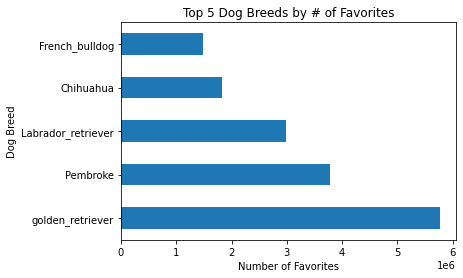

In [64]:
total_favorites.plot(kind='barh', x='favorite_count', y='p1');
plt.ylabel('Dog Breed');
plt.xlabel('Number of Favorites');
plt.title('Top 5 Dog Breeds by # of Favorites');
plt.show();